In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:
Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes: >50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school,Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,10th,Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married,Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico,Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,Greece,South, China, Cuba, Iran, Honduras, Philippines, Italy,Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland,France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [123]:
                                                                                                                                                                                                                        import pandas as pd
                                                                                                                                                                                                                        import numpy as np
                                                                                                                                                                                                                        import xgboost as xgb
                                                                                                                                                                                                                        import pickle
                                                                                                                                                                                                                        from sklearn import datasets
                                                                                                                                                                                                                        from xgboost import XGBClassifier
                                                                                                                                                                                                                        from sklearn.metrics import accuracy_score

In [226]:
names=['age','workclass','fnlwgt','education','edunum','marital','job','relationship','race','sex','gain','loss','hoursweek','country','classifier']
df1 = pd.read_csv('D:/adult.csv',header=None,names=names)
df2 = pd.read_csv('D:/adult_test.csv',header=None,skiprows=1,names=names)
df=pd.concat([df1,df2])
df.replace(' ?',np.nan,inplace=True)


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           48842 non-null  int64 
 1   workclass     46043 non-null  object
 2   fnlwgt        48842 non-null  int64 
 3   education     48842 non-null  object
 4   edunum        48842 non-null  int64 
 5   marital       48842 non-null  object
 6   job           46033 non-null  object
 7   relationship  48842 non-null  object
 8   race          48842 non-null  object
 9   sex           48842 non-null  object
 10  gain          48842 non-null  int64 
 11  loss          48842 non-null  int64 
 12  hoursweek     48842 non-null  int64 
 13  country       47985 non-null  object
 14  classifier    48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [85]:
df2 = pd.read_csv('D:/adult_test.csv',header=None,skiprows=1,names=names)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           16281 non-null  int64 
 1   workclass     16281 non-null  object
 2   fnlwgt        16281 non-null  int64 
 3   education     16281 non-null  object
 4   edu-num       16281 non-null  int64 
 5   marital       16281 non-null  object
 6   job           16281 non-null  object
 7   relationship  16281 non-null  object
 8   race          16281 non-null  object
 9   sex           16281 non-null  object
 10  gain          16281 non-null  int64 
 11  loss          16281 non-null  int64 
 12  hours-week    16281 non-null  int64 
 13  country       16281 non-null  object
 14  classifier    16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [86]:
df=pd.concat([df1,df2])

In [23]:
df.head(10)

,age,workclass,fnlwgt,education,edu-num,marital,job,relationship,race,sex,gain,loss,hours-week,country,classifier
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           48842 non-null  int64 
 1   workclass     48842 non-null  object
 2   fnlwgt        48842 non-null  int64 
 3   education     48842 non-null  object
 4   edu-num       48842 non-null  int64 
 5   marital       48842 non-null  object
 6   job           48842 non-null  object
 7   relationship  48842 non-null  object
 8   race          48842 non-null  object
 9   sex           48842 non-null  object
 10  gain          48842 non-null  int64 
 11  loss          48842 non-null  int64 
 12  hours-week    48842 non-null  int64 
 13  country       48842 non-null  object
 14  classifier    48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [87]:
df.isnull().sum()

age             0
workclass       0
fnlwgt          0
education       0
edu-num         0
marital         0
job             0
relationship    0
race            0
sex             0
gain            0
loss            0
hours-week      0
country         0
classifier      0
dtype: int64

In [26]:
df.dtypes

age              int64
workclass       object
fnlwgt           int64
education       object
edu-num          int64
marital         object
job             object
relationship    object
race            object
sex             object
gain             int64
loss             int64
hours-week       int64
country         object
classifier      object
dtype: object

In [52]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [57]:
df.job.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [125]:
df.workclass.value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [126]:
df.job.value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: job, dtype: int64

In [171]:
df.replace(' ?',np.nan,inplace=True)

In [146]:
df.isnull().sum()

age                0
workclass       2799
fnlwgt             0
education          0
edu-num            0
marital            0
job             2809
relationship       0
race               0
sex                0
gain               0
loss               0
hours-week         0
country          857
classifier         0
dtype: int64

In [157]:
df.workclass.isna().sum()

2799

In [155]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [172]:
df.workclass.value_counts(dropna=False)

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
NaN                   2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [228]:
df=df.replace(' Without-pay' ,' Never-worked')

In [187]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Never-worked'], dtype=object)

In [188]:
df['workclass'].value_counts(dropna=False)

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
NaN                   2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Never-worked           31
Name: workclass, dtype: int64

In [229]:
df['workclass'] = df['workclass'].fillna(0)

In [198]:
df.workclass.value_counts(dropna=False)

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
0                     2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Never-worked           31
Name: workclass, dtype: int64

In [230]:
df['workclass']=df.workclass.replace(0 ,'other')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

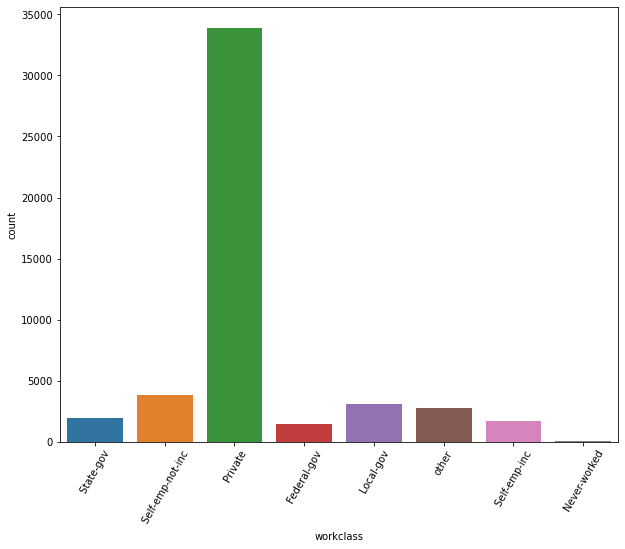

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [207]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'edu-num', 'marital', 'job',
       'relationship', 'race', 'sex', 'gain', 'loss', 'hours-week', 'country',
       'classifier'],
      dtype='object')

In [208]:
df.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89], dtype=int64)

In [209]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
edu-num            0
marital            0
job             2809
relationship       0
race               0
sex                0
gain               0
loss               0
hours-week         0
country          857
classifier         0
dtype: int64

In [232]:
df.fnlwgt.unique()

array([ 77516,  83311, 215646, ..., 173449,  89686, 350977], dtype=int64)

In [233]:
df.fnlwgt.describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [235]:
df.fnlwgt.describe()

count    48842.000000
mean        11.982958
std          0.630817
min          9.416216
25%         11.674632
50%         12.090356
75%         12.378525
max         14.214556
Name: fnlwgt, dtype: float64

In [234]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x :np.log1p(x))

In [217]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'edu-num', 'marital', 'job',
       'relationship', 'race', 'sex', 'gain', 'loss', 'hours-week', 'country',
       'classifier'],
      dtype='object')

In [238]:
df.education.value_counts(dropna=False)

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [240]:
df.education.isnull().sum()

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

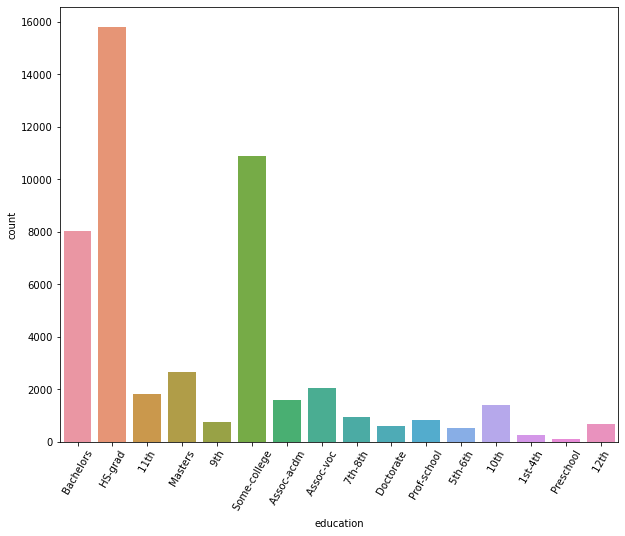

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(df['education'])
plt.xticks(rotation=60)

In [243]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x


In [244]:
df['education'] = df['education'].apply(primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

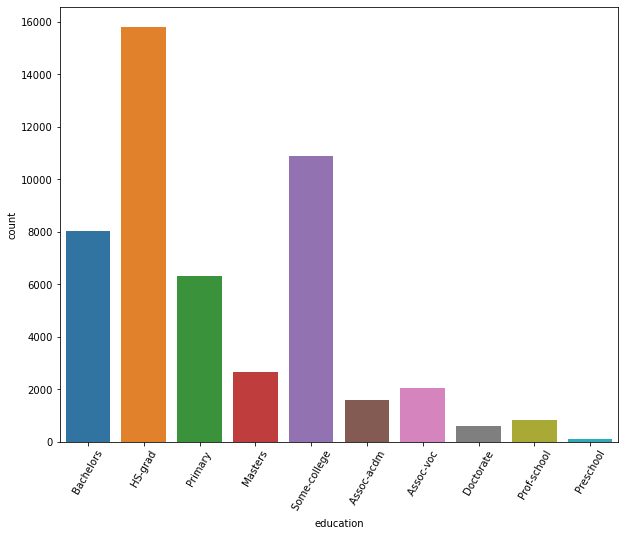

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(df['education'])
plt.xticks(rotation=60)

In [246]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'edunum', 'marital', 'job',
       'relationship', 'race', 'sex', 'gain', 'loss', 'hoursweek', 'country',
       'classifier'],
      dtype='object')

In [250]:
df.edunum.isnull().sum()

0

In [255]:
df.marital.value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital, dtype: int64

In [257]:
df['marital'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

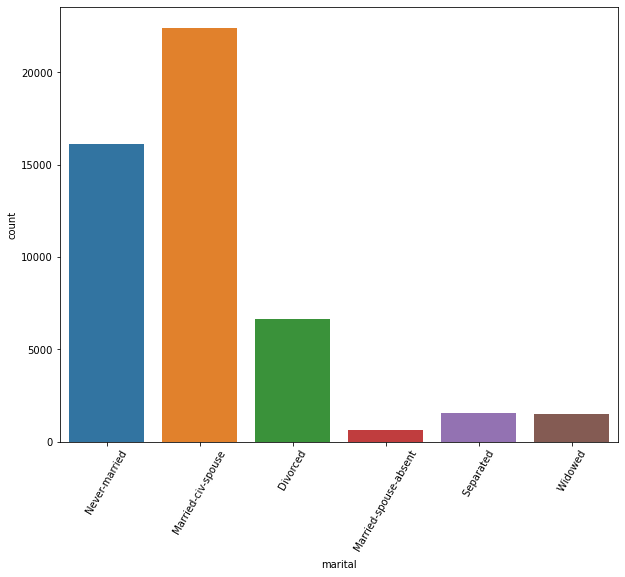

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(df['marital'])
plt.xticks(rotation=60)

In [260]:
df.job.isnull().sum()

2809

In [261]:
df.job.value_counts(dropna=False)

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
NaN                   2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: job, dtype: int64

In [262]:

df['job'].fillna('0',inplace=True)


In [263]:
df['job'].replace(' Armed-Forces','0',inplace=True)

In [264]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [266]:
df['country'] = df['country'].apply(native)

In [267]:
df = df.replace({' <=50K':0,' >50K':1,' <=50K.':0,' >50K.':1})

In [268]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'edunum', 'marital', 'job',
       'relationship', 'race', 'sex', 'gain', 'loss', 'hoursweek', 'country',
       'classifier'],
      dtype='object')

In [269]:
X = df.drop(['classifier'],axis=1)
y = df['classifier']


In [270]:
X_d = pd.get_dummies(X)

In [271]:
X_d

,age,fnlwgt,edunum,gain,loss,hoursweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,country_Asian,country_Central_America,country_EU,country_North_America,country_South_America
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,12.280345,13,0,0,36,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
16277,64,12.680454,9,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
16278,38,12.834639,13,0,0,50,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
16279,44,11.337286,13,5455,0,40,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [272]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_d)

In [273]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=101)

In [138]:
x=df.drop(columns='classifier', axis=1)
y= df['classifier']

In [274]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [275]:
model = XGBClassifier(objective='binary:logistic')

In [276]:
model.fit(x_train, y_train)

C:\Users\vindh\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [278]:
model.score(x_train, y_train)

0.9012255403784843

In [279]:
model.score(x_test, y_test)

0.8686958302054187

In [280]:
from sklearn.model_selection import GridSearchCV

In [285]:
param_grid={
   
    ' learning_rate':[0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [286]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
Xbc = XGBClassifier()
Gcv = GridSearchCV(Xbc,param_grid,scoring='accuracy',cv=5,n_jobs=3,verbose=3)
Gcv.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   12.8s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done 160 out of 160 | elapsed:  4.2min finished
C:\Users\vindh\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [298]:
XBC = XGBClassifier(learning_rate=0.01,max_depth=5,n_estimators=200)
XBC.fit(x_train,y_train)


[17:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [299]:
XBC.score(x_test,y_test)


0.8549102572851975

In [300]:
y_pred = XBC.predict(x_test)

In [301]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [302]:
print(f'Accuracy Score:{accuracy_score(y_test,y_pred)}')
print('*'*50)
print(f'Confusion Matrix:{confusion_matrix(y_test,y_pred)}')
print('*'*50)
print(f'Classification Report: {classification_report(y_test,y_pred)}')

Accuracy Score:0.8549102572851975
**************************************************
Confusion Matrix:[[10537   563]
 [ 1563  1990]]
**************************************************
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.95      0.91     11100
           1       0.78      0.56      0.65      3553

    accuracy                           0.85     14653
   macro avg       0.83      0.75      0.78     14653
weighted avg       0.85      0.85      0.85     14653

